In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [3]:
classes_name = ['background', 'kidney', 'tumor']
cls_map = {name: i for i, name in enumerate(classes_name)}
cls_map

{'background': 0, 'kidney': 1, 'tumor': 2}

In [4]:
img_path = '/content/drive/My Drive/緯育醫學影像/Day6/annotation_tools/img/seg1.png'
json_path = '/content/drive/My Drive/緯育醫學影像/Day6/annotation_tools/anno/seg1.json'

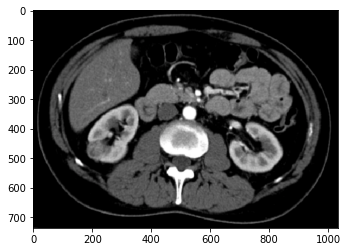

In [5]:
img = cv2.imread(img_path)[:,:,::-1]
plt.imshow(img)

In [6]:
data = json.load(open(json_path))

In [7]:
data

{'flags': {},
 'imageData': 'iVBORw0KGgoAAAANSUhEUgAABAgAAALhCAYAAADSApZqAAAMJmlDQ1BJQ0MgUHJvZmlsZQAAeJyVlwdUk8kWgOcvqSS0QChSQm+iFOnSa6RKFWyEJJBQYkgIKnZkUYG1oKKCFV0Vsa0FkEVF7A3B3h+KqCjroi42VN4kAXT1vPfOu+fM/3+5c+fOvTfzz5kBQC2GIxZno+oA5IjyJLGhAawJySksUidAABmoAAPgyeFKxf4xMREAytD7n/LuJrSGcs1e7uvn/v8qGjy+lAsAEgM5jSfl5kA+BADuyhVL8gAg9EC92fQ8MWQijBJoSWCAkM3lnKFkdzmnKTlCYRMfGwg5FQAyjcORZACgKo+Llc/NgH5UyyA7iHhCEeQmyD5cAYcH+TPkkTk50yCrWUO2TvvOT8Y/fKYN++RwMoZZmYtCyEFCqTibM/P/LMf/lpxs2dAcZrDRBJKwWHnO8rplTQuXMw3yOVFaVDRkTcjXhTyFvZyfCmRhCYP2H7jSQFgzwAQApfE4QeGQDSCbirKjIgb1PunCEDZkWHs0XpjHjleORXmSabGD/tEZfGlw3BBzJIq55DYlsqwE/0GfGwV89pDPxgJBfJIyTrQtX5gYBVkV8n1pVlz4oM2LAkFg1JCNRBYrjxn+5xhIl4TEKm0w8xzpUF6Yp0DIjhrkiDxBfJhyLDaFy1HEpgs5ky+dEDEUJ48fFKzMCyvkixIG48fKxXkBsYP228TZMYP2WBM/O1SuN4XcKs2PGxrbmwcXmzJfHIjzYuKVseFamZxxMcoYcFsQAQJBEGABGWxpYBrIBMLWnvoe+EvZEwI4QAIyAB/YD2qGRiQpekTwGQcKwJ+Q+EA6PC5A0csH+VD/ZVirfNqDdEVvvmJEFngKOQeEg2z4W6YYJRqeLRE8gRrhT7NzYazZsMn7ftKx1IZ0xGBiEDGMGEK0wfVxH9wLj4BPP9iccHfcYyiub/a

In [8]:
height = data['imageHeight']
width = data['imageWidth']

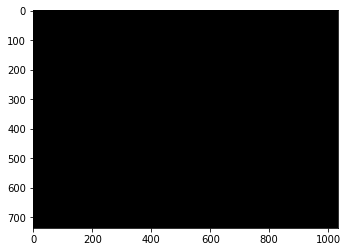

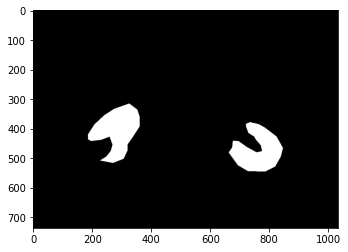

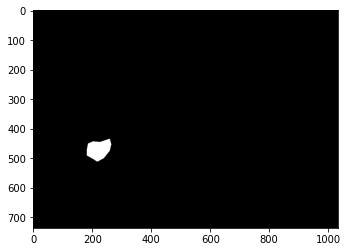

In [9]:
# Draw Object mask
mask = np.zeros((len(classes_name), height, width))
for shape in data['shapes']:
    cls_name = shape['label']
    cls_idx = cls_map[cls_name]
    points = shape['points']
    cv2.fillPoly(mask[cls_idx], np.array([points], dtype=np.int32), 255) # fill object with 255

for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [10]:
# update backgroud mask
mask[0] = 255-np.max(mask[1:], axis=0)

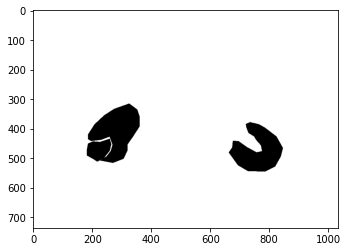

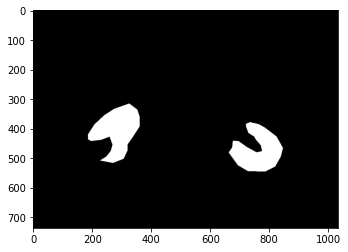

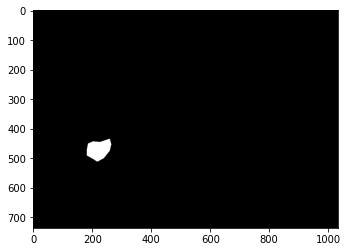

In [11]:
# show all masks
for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [12]:
# Get File name
filename_img = os.path.split(img_path)[-1]
filename = filename_img.split('.')[0]
filename

'seg1'

In [13]:
# Save Mask File
for i, m in enumerate(mask):
    path_save = os.path.join('/content/drive/My Drive', f'{filename}_mask_{i}.png')
    cv2.imwrite(path_save, m)